In [1]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [2]:
x=make_moons(n_samples=10_000, noise=0.4, random_state=25)[0]
y=make_moons(n_samples=10_000, noise=0.4, random_state=25)[1]

In [3]:
x_train=train_test_split(x,y)[0]
x_test=train_test_split(x,y)[1]
y_train=train_test_split(x,y)[2]
y_test=train_test_split(x,y)[3]

hare dos casos con entropy y con gini

en ambos casos movere el hiperparametro max_depth


para ver como reacciona el accuracy

In [4]:
#probare entropy primero , fijo random state igual en ambos ejercicios
pipe = Pipeline([
    ("tree", DecisionTreeClassifier(criterion="entropy", random_state=2205))
])

In [5]:
# decidi dejar accuraccy como parametro para decidir si el modelo mejora o empeora
pipe.fit(x_train, y_train);
cross=cross_validate(pipe, x, y, cv=5, scoring=["accuracy"])
accuracy=cross["test_accuracy"]

In [6]:
#Como referencia, este accuracy tendria por default sin modoficar el hiper parametro max_depth
base_accura=accuracy.mean()
base_accura

0.8041

In [7]:
#movere max_depth wn un rango de 1 a 99
acc=[]
for i in range(1,100):
    depth=i
    pipe_d = Pipeline([
        ("tree", DecisionTreeClassifier(criterion="entropy",max_depth=depth, random_state=314))
    ])
    pipe_d.fit(x_train, y_train);
    cross=cross_validate(pipe_d, x, y, cv=5, scoring=["accuracy"])
    acc=acc+[cross["test_accuracy"].mean()]

En la grafica podemos observar que al agregar demasiada profundidad decae el accuracy, el maximo se lacanza en :

In [8]:
#en depth
acc.index(max(acc))

6

con un valor de :

In [9]:
#acc maximo
max(acc)


0.8608

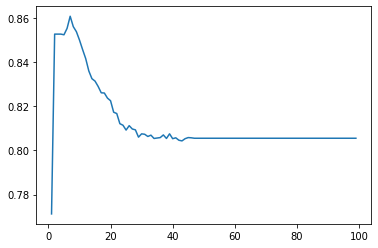

In [10]:
plt.plot(range(1,100), acc);

Ahora el mismo ejercicio pero con gini el cual es el parametro default de DecisionTreeClassifier

In [12]:
acc2=[]
for i in range(1,100):
    depth=i
    pipe_d2 = Pipeline([
        ("tree", DecisionTreeClassifier(max_depth=depth, random_state=2205))
    ])
    pipe_d2.fit(x_train, y_train);
    cross=cross_validate(pipe_d2, x, y, cv=5, scoring=["accuracy"])
    acc2=acc2+[cross["test_accuracy"].mean()]

En la grafica podemos observar que al agregar demasiada profundidad decae el accuracy, el maximo se lacanza en :

In [13]:
#en depth
acc2.index(max(acc2))

6

con un valor de :

In [14]:
#acc maximo
max(acc2)


0.8583999999999999

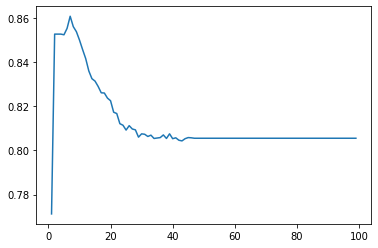

In [15]:
plt.plot(range(1,100), acc);

podemos notar que apesar de alcanzar el maximo en la misma profundidad obtenemos ligeramente un mejor accuracy con entropy